In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [2]:
#Cargo los datos en memoria

postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_y_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalle = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')

# Primer análisis de los datos


## Primer dataframe: postulantes_educacion

In [3]:
#Vistazo a la estructura del dataframe

postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [4]:
#Posee 298231 registros

postulantes_educacion.shape

(298231, 3)

In [5]:
#Renombro las columnas a un nombre más apropiado

postulantes_educacion = postulantes_educacion.rename(columns={"nombre":"gradoactual"})
postulantes_educacion.head()

,idpostulante,gradoactual,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [6]:
#Hay algun dato nulo?

postulantes_educacion.isnull().any()

idpostulante    False
gradoactual     False
estado          False
dtype: bool

In [7]:
#Existen 188752 postulantes diferentes

postulantes_educacion['idpostulante'].value_counts().count()

188752

In [8]:
#La variable gradoactual es categórica, veamos cuáles son sus posibles valores. 

postulantes_educacion['gradoactual'].value_counts()

Secundario           110256
Universitario        104295
Terciario/Técnico     47733
Otro                  24748
Posgrado               7387
Master                 3598
Doctorado               214
Name: gradoactual, dtype: int64

In [9]:
#Estado también es categórica, veamos sus posibles estados

postulantes_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

## Segundo dataframe: postulantes_genero_y_edad

In [10]:
#Vistazo a la estructura del dataframe

postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [11]:
#200888 registros

postulantes_genero_y_edad.shape

(200888, 3)

In [12]:
#Hay postulantes sin fecha de nacimiento cargada, luego veremos cuáles son

postulantes_genero_y_edad.isnull().any()

idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

In [13]:
#No hay postulantes repetidos en el dataframe, pero son más de los que aparecen en el postulantes_educacion. Luego hay
#postulantes que no poseen ninguna educación.

postulantes_genero_y_edad['idpostulante'].value_counts().size

200888

In [14]:
#Comprobamos los posibles valores de sexo

postulantes_genero_y_edad['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [15]:
#Vimos que hay postulantes sin fecha de nacimiento cargada, veamos cuántos son
#Tenemos 4750 postulantes sin fecha de nacimiento declarada

len(postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()])

4750

In [16]:
#Observando el formato de las fechas no nulas, vemos que existen 7 que no respetan el formato AA/MM/DD
#Dado que representan un porcentaje ínfimo del total de registros, elegimos ignorarlos para así evitar tener que 
#asumir qué fecha representan.

postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()==False].sort_values('fechanacimiento',ascending=True).head(10)

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,0004-07-19,MASC
149653,1QPQ8QL,0011-03-08,MASC
145683,dYjV0rb,0012-11-04,NO_DECLARA
130846,8M2R6pz,0024-02-09,FEM
71458,LN85Y3b,0029-05-11,MASC
56206,xkPwXwY,0031-12-11,FEM
141832,A36Npjj,0033-09-14,FEM
154559,xkdvwm0,1775-07-09,MASC
164618,96X1loa,1917-07-08,MASC
156483,4rP8l0R,1921-08-18,FEM


In [17]:
#Convierto la columna fechanacimiento a formato datetime. 

postulantes_genero_y_edad['fechanacimiento'] = pd.to_datetime(postulantes_genero_y_edad['fechanacimiento'], errors='coerce')

In [18]:
#Si revisamos ahora a los postulantes sin fecha de nacimiento, observamos que ahora hay 7 más que antes. Estos 7 deberían ser
#los que tenían el formato incorrecto.

len(postulantes_genero_y_edad.loc[postulantes_genero_y_edad.fechanacimiento.isnull()])

4757

In [19]:
#Tal como lo anticipamos, ahora tienen fecha de nacimiento nula.

postulantes_genero_y_edad.iloc[[148638,149653,145683,130846,71458,56206,141832],:]

,idpostulante,fechanacimiento,sexo
148638,GNZOvAv,NaT,MASC
149653,1QPQ8QL,NaT,MASC
145683,dYjV0rb,NaT,NO_DECLARA
130846,8M2R6pz,NaT,FEM
71458,LN85Y3b,NaT,MASC
56206,xkPwXwY,NaT,FEM
141832,A36Npjj,NaT,FEM


In [20]:
#Vamos ahora a agregar una columna adicional al dataframe, de modo que podamos observar la edad de cada persona

postulantes_genero_y_edad['edad'] = ((pd.datetime.today() - postulantes_genero_y_edad['fechanacimiento']).dt.days/365)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].fillna(0)
postulantes_genero_y_edad['edad'] = postulantes_genero_y_edad['edad'].astype(int)
postulantes_genero_y_edad.head(10)

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,47
1,5awk,1962-12-04,FEM,55
2,ZaO5,1978-08-10,FEM,39
3,NdJl,1969-05-09,MASC,48
4,eo2p,1981-02-16,MASC,37
5,Ez8J,1968-12-18,MASC,49
6,aOQq,1966-07-16,MASC,51
7,8BkL,1976-07-21,FEM,41
8,1d2B,1976-02-28,MASC,42
9,NPBx,1981-03-09,MASC,37


In [21]:
#Reviso la edad de las personas que cumplen años el 29/02

postulantes_nacidos_en_febrero = postulantes_genero_y_edad.loc[postulantes_genero_y_edad['fechanacimiento'].dt.month == 2]
postulantes_nacidos_en_febrero.loc[postulantes_nacidos_en_febrero['fechanacimiento'].dt.day == 29].sort_values('fechanacimiento',ascending = False).head(10)

,idpostulante,fechanacimiento,sexo,edad
197120,6rP38R3,2000-02-29,FEM,18
194211,3NP3dAJ,2000-02-29,FEM,18
186798,Bm5dkzR,2000-02-29,MASC,18
99625,xka3KJz,1996-02-29,MASC,22
73390,KBzQ4EX,1996-02-29,FEM,22
129557,rm05XGO,1996-02-29,FEM,22
129283,pzMVjZL,1996-02-29,FEM,22
128947,BmB6zNR,1996-02-29,MASC,22
118090,5mdVq4X,1996-02-29,FEM,22
111994,4rdGeJA,1996-02-29,FEM,22


## Tercer dataframe: vistas

In [22]:
#Vistazo a la estructura del dataframe

vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [23]:
#El dataframe posee 961897 registros

vistas.shape

(961897, 3)

In [24]:
#No tenemos registros nulos

vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
dtype: bool

In [25]:
#En este dataframe tenemos 7459 avisos únicos 

vistas['idAviso'].value_counts().size

7458

In [26]:
#Y de los 200888 postulantes del dataset, solamente 87443 han visto al menos un aviso

vistas['idpostulante'].value_counts().size

87443

In [27]:
#Ordeno la informacion sobre la fecha y hora de visualizaciones, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

vistas['timestamp'] = pd.to_datetime(vistas['timestamp'])
vistas['fechavisualizacion'] = vistas['timestamp'].dt.date
vistas['horavisualizacion'] = vistas['timestamp'].dt.time
vistas.sort_values('fechavisualizacion').head(10)

,idAviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000
31485,1112341841,2018-02-23 21:51:51.982,ekormbo,2018-02-23,21:51:51.982000
31486,1112200601,2018-02-23 21:51:52.505,OqmKPMx,2018-02-23,21:51:52.505000
31487,1112359762,2018-02-23 21:51:53.945,dY5xDpa,2018-02-23,21:51:53.945000
31488,1112359762,2018-02-23 21:51:55.853,dY5xDpa,2018-02-23,21:51:55.853000
31489,1112325077,2018-02-23 21:51:56.130,LNMLjrb,2018-02-23,21:51:56.130000
31490,1112206678,2018-02-23 21:51:58.159,W9WedvX,2018-02-23,21:51:58.159000
31491,1112358985,2018-02-23 21:51:58.338,VNljdJj,2018-02-23,21:51:58.338000
31492,1112356859,2018-02-23 21:52:01.285,bOJwJp4,2018-02-23,21:52:01.285000
31493,1112359793,2018-02-23 21:52:01.696,8MaQjP3,2018-02-23,21:52:01.696000


## Cuarto dataframe: postulaciones

In [28]:
#Vistazo a la estructura del dataframe

postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [29]:
#Tenemos 3401623 registros

postulaciones.shape

(3401623, 3)

In [30]:
#No hay registros nulos

postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
dtype: bool

In [31]:
#Tenemos 12692 avisos con al menos una postulacion

postulaciones['idaviso'].value_counts().size

12692

In [32]:
#Todos los postulantes del dataset se han postulado al menos a un aviso

postulaciones['idpostulante'].value_counts().size

200888

In [33]:
##Ordeno la informacion sobre la fecha y hora de postulación, modificando su formato y agregando columnas que me permitan
#analizar de forma individual la fecha y la hora.

postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones = postulaciones.rename(columns={'fechapostulacion':'fechahorapostulacion'})
postulaciones['fechapostulacion'] = postulaciones['fechahorapostulacion'].dt.date
postulaciones['horapostulacion'] = postulaciones['fechahorapostulacion'].dt.time

postulaciones.sort_values('fechapostulacion').head(10)

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34
736839,1112261550,qekqr4b,2018-01-15 19:00:07,2018-01-15,19:00:07
2524985,1112145604,N5Doal,2018-01-15 11:48:56,2018-01-15,11:48:56
2524984,1112239063,N5Doal,2018-01-15 11:44:57,2018-01-15,11:44:57
736893,1112257631,PmV48YJ,2018-01-15 10:12:34,2018-01-15,10:12:34
736894,1112261524,PmV48YJ,2018-01-15 16:26:58,2018-01-15,16:26:58
736941,1112245598,KBAvVxX,2018-01-15 22:41:33,2018-01-15,22:41:33
736942,1112247307,KBAvVxX,2018-01-15 22:42:12,2018-01-15,22:42:12
736943,1111936969,KBAvVxX,2018-01-15 22:42:56,2018-01-15,22:42:56
736944,1112251166,KBAvVxX,2018-01-15 22:43:08,2018-01-15,22:43:08


## Quinto dataframe: avisos_online

In [34]:
#Vistazo a la estructura del dataframe

avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [35]:
#Existen 5028 avisos online

avisos_online.shape

(5028, 1)

In [36]:
#No hay registros nulos

avisos_online.isnull().any()

idaviso    False
dtype: bool

In [37]:
#Tampoco hay ids repetidos

avisos_online['idaviso'].value_counts().size

5028

## Sexto dataframe: avisos_detalle

In [38]:
#Vistazo a la estructura del dataframe

avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [39]:
#Existen 13534 avisos contra los 5028 que teniamos en avisos_online. Significa que los restantes 8506 están inactivos?

avisos_detalle.shape

(13534, 11)

In [40]:
#Tenemos nulos en los campos ciudad, mapa y denominacion_empresa

avisos_detalle.isnull().any()

idaviso                 False
idpais                  False
titulo                  False
descripcion             False
nombre_zona             False
ciudad                   True
mapacalle                True
tipo_de_trabajo         False
nivel_laboral           False
nombre_area             False
denominacion_empresa     True
dtype: bool

In [41]:
#13487 no tienen registrada la ciudad

avisos_detalle.loc[avisos_detalle['ciudad'].isnull()].shape

(13487, 11)

In [42]:
#Cinco avisos no tienen registrada la empresa que lleva a cabo la búsqueda

avisos_detalle.loc[avisos_detalle['denominacion_empresa'].isnull()].shape

(5, 11)

In [43]:
#Todos los avisos son del mismo país

avisos_detalle['idpais'].value_counts()

1    13534
Name: idpais, dtype: int64

In [44]:
#Zonas entre las que se reparten los avisos, podemos corroborar que todos los avisos 
#corresponden a Buenos Aires como dice la consigna

avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

# Exploración de los datos

## Cantidad de postulaciones a lo largo del tiempo


### Postulaciones por día a lo largo del set de datos

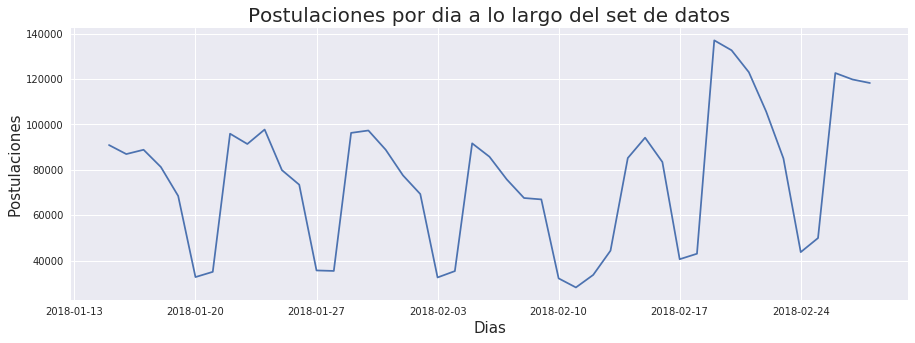

In [45]:
#Observamos un ciclo, aproximadamente cada una semana se da una descenso muy marcado en la cantidad de postulaciones

postulaciones['fechapostulacion'].value_counts().plot(kind='line',figsize=(15,5))
plt.title("Postulaciones por dia a lo largo del set de datos", size=20)
plt.xlabel("Dias",size=15)
plt.ylabel("Postulaciones",size=15)
plt.show()

### ¿Se ven afectadas las postulaciones según el día de la semana en el que estamos?

In [48]:
#Vamos a responder a la pregunta, para ello pimero necesito identificar en qué día de la semana se realizó cada una
#de las postulaciones del set de datos

postulaciones['diapostulacion'] = postulaciones['fechahorapostulacion'].dt.weekday_name
postulaciones.head()

,idaviso,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,diapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06,09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22,09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22,09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25,18:55:03,Thursday


In [49]:
#Veamos cómo se distribuyen las postulaciones según en qué día de la semana estamos

postulaciones_segun_dia = postulaciones['diapostulacion'].value_counts()
postulaciones_segun_dia

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: diapostulacion, dtype: int64

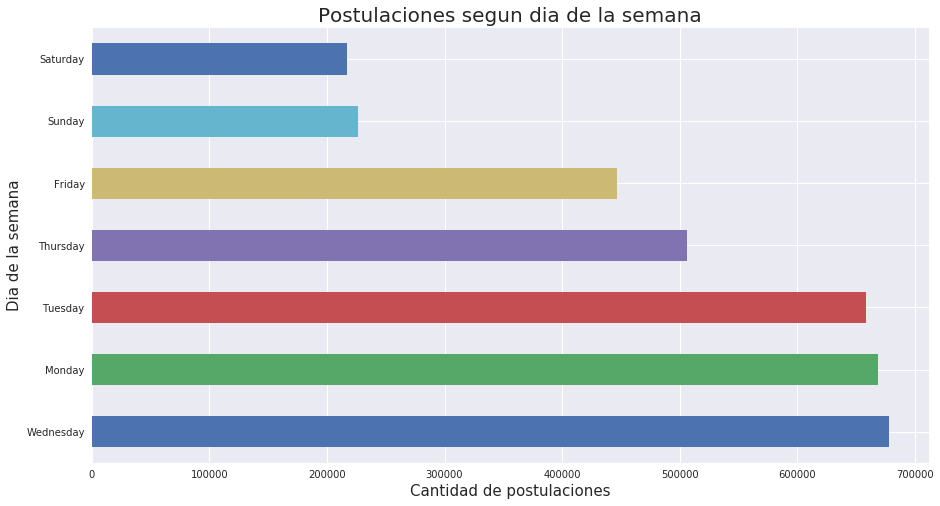

In [50]:
#Ahora lo volcamos a un gráfico para comunicar el resultado.
#La respuesta a la pegunta que formulamos claramente es sí.
#Podemos ver cómo decae la actividad durante la segunda mitad de la semana y cómo se concentra en sus 
#primeros tres días hábiles.

postulaciones_segun_dia.plot(kind="barh", figsize=(15,8),grid=True)
plt.title('Postulaciones segun dia de la semana',fontsize=20)
plt.xlabel("Cantidad de postulaciones",fontsize=15)
plt.ylabel("Dia de la semana", fontsize=15)
plt.show()

### Actividad durante el dia más concurrido de la semana

In [51]:
#Obtengo todas las postulaciones de los miércoles

postulaciones_miercoles = postulaciones.loc[postulaciones['diapostulacion'] == 'Wednesday']

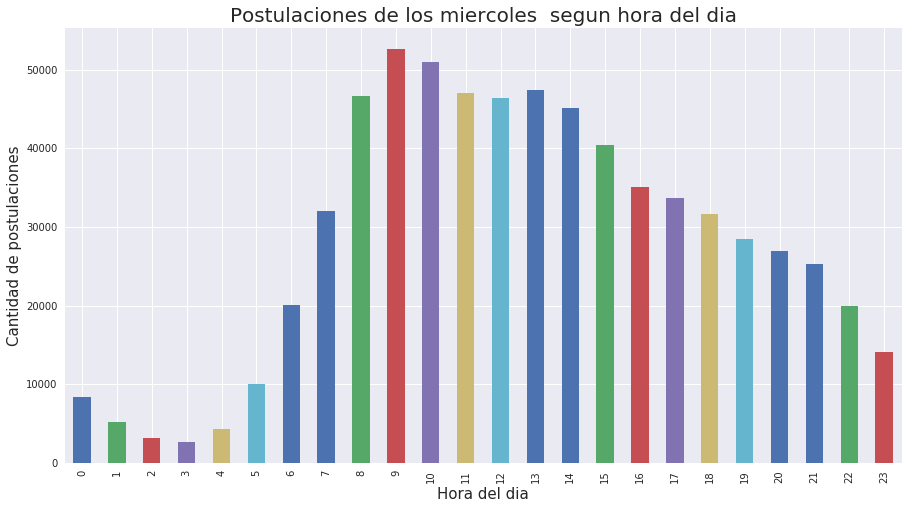

In [52]:
#Vemos que el pico de postulaciones se produce durante el transcurso de las 9 AM y a partir de allí sigue una tendencia
#descendente salvo una ligera remontada a las 13 hs (Break para almorzar?)

postulaciones_miercoles['fechahorapostulacion'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(15,8), grid=True)
plt.title('Postulaciones de los miercoles  segun hora del dia',fontsize=20)
plt.xlabel("Hora del dia",fontsize=15)
plt.ylabel("Cantidad de postulaciones", fontsize=15)
plt.show()

## Cantidad de avisos

###  Cantidad de avisos según nivel laboral 

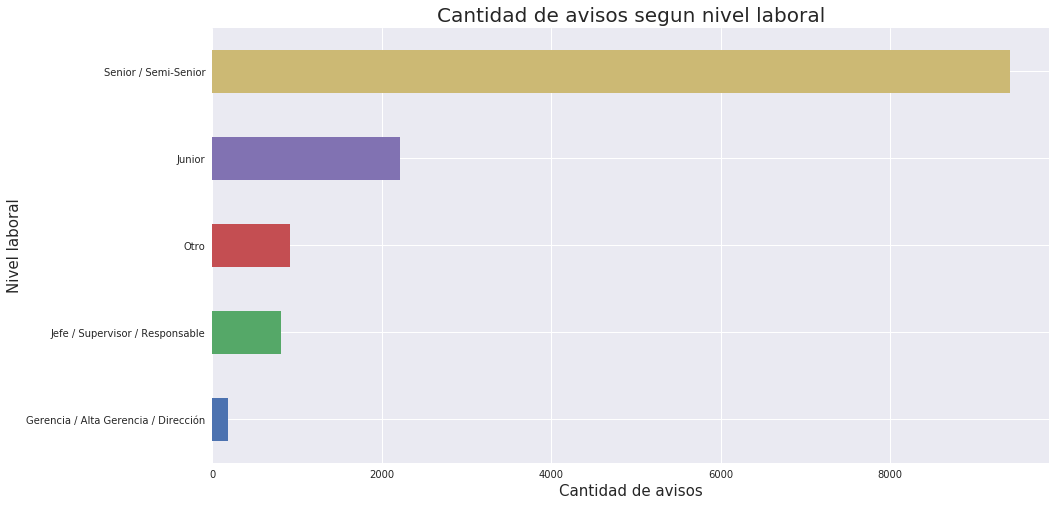

In [53]:
avisos_detalle['nivel_laboral'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Cantidad de avisos segun nivel laboral', fontsize = 20)
plt.ylabel('Nivel laboral', fontsize = 15)
plt.xlabel('Cantidad de avisos', fontsize = 15)
plt.show()

### Cantidad de avisos por empresa 

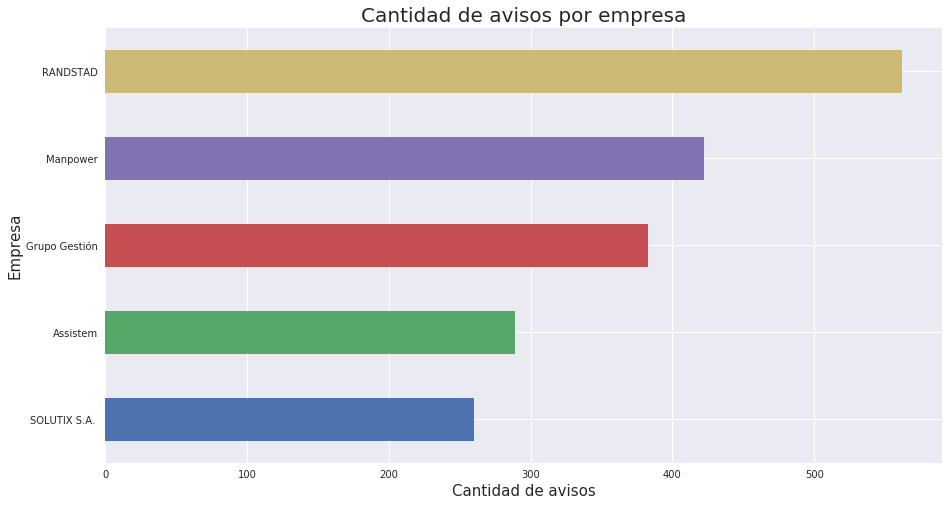

In [54]:
avisos_detalle['denominacion_empresa'].value_counts().head().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Cantidad de avisos por empresa', fontsize = 20)
plt.ylabel('Empresa', fontsize = 15)
plt.xlabel('Cantidad de avisos', fontsize = 15)
plt.show()

### Cantidad de avisos por zona 

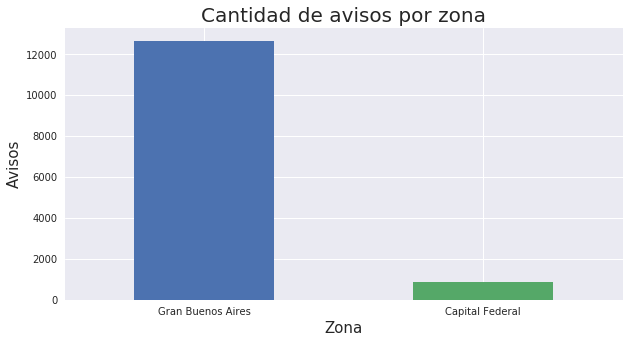

In [59]:
avisos_detalle['nombre_zona'].value_counts().head(2).plot(kind='bar',rot=0, figsize=(10,5))
plt.title("Cantidad de avisos por zona", size=20)
plt.xlabel("Zona",size=15)
plt.ylabel("Avisos",size=15)
plt.show()

### Cantidad de avisos por tipo de trabajo 

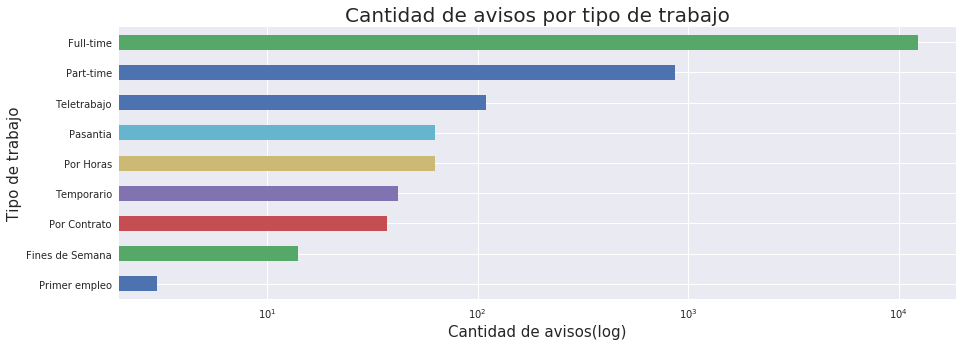

In [60]:
avisos_detalle['tipo_de_trabajo'].value_counts().sort_values().plot(logx=True,kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por tipo de trabajo", size=20)
plt.xlabel("Cantidad de avisos(log)",size=15)
plt.ylabel("Tipo de trabajo",size=15)
plt.show()

### Cantidad de avisos por area 

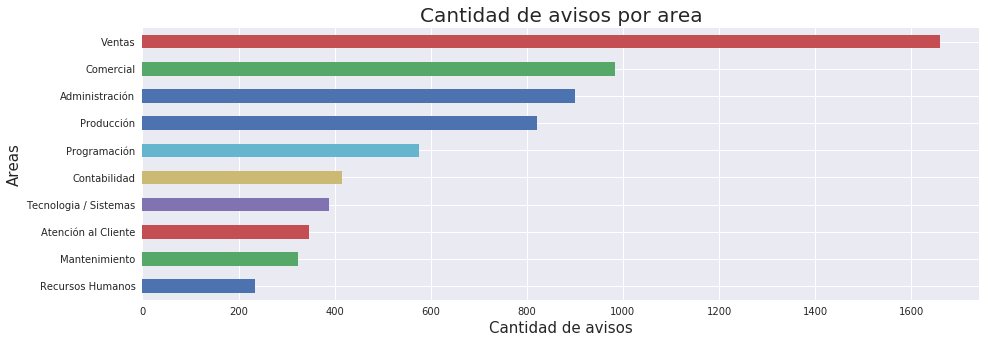

In [61]:
avisos_detalle['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Cantidad de avisos por area", size=20)
plt.ylabel("Areas",size=15)
plt.xlabel("Cantidad de avisos",size=15)
plt.show()

## Cantidad de postulantes 

### Cantidad de postulantes por educacion y estado

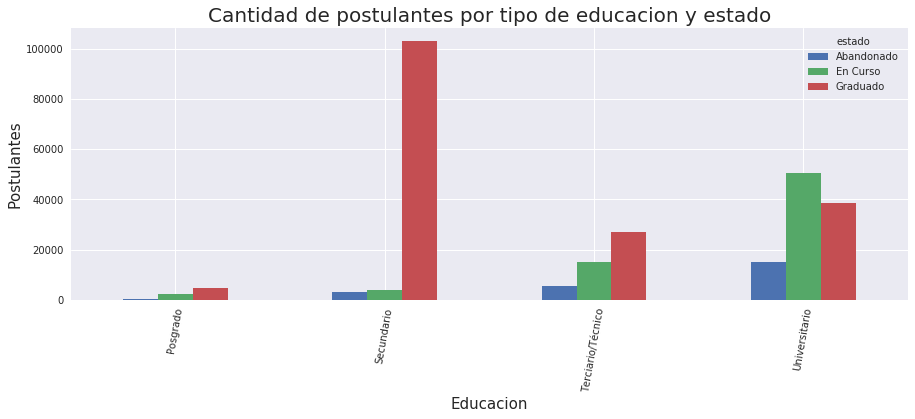

In [62]:
postulantes_educacion.groupby(['gradoactual','estado']).count().unstack()['idpostulante'].drop(['Master','Doctorado','Otro']).plot(kind='bar',rot=80, figsize=(15,5))
plt.title("Cantidad de postulantes por tipo de educacion y estado", size=20)
plt.xlabel("Educacion",size=15)
plt.ylabel("Postulantes",size=15)
plt.show()

### Top 10 edades  que más postulan

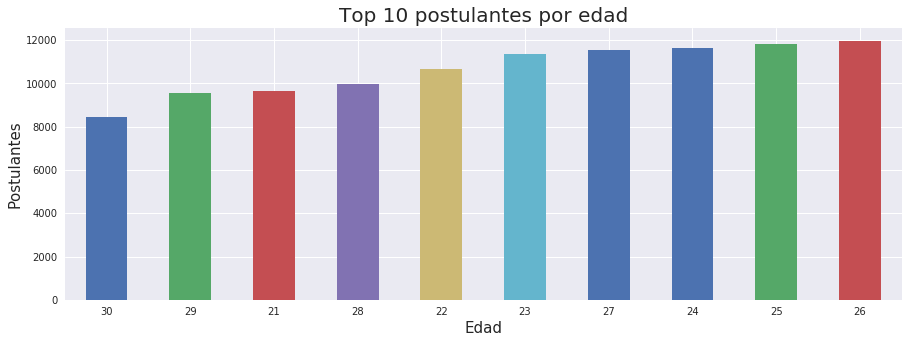

In [63]:
postulantes_genero_y_edad['edad'].value_counts().head(10).sort_values().plot(kind='bar', rot=0, figsize=(15,5))
plt.title("Top 10 postulantes por edad", size=20)
plt.xlabel("Edad", size=15)
plt.ylabel("Postulantes",size=15)
plt.show()

### Cantidaad de postulantes por género

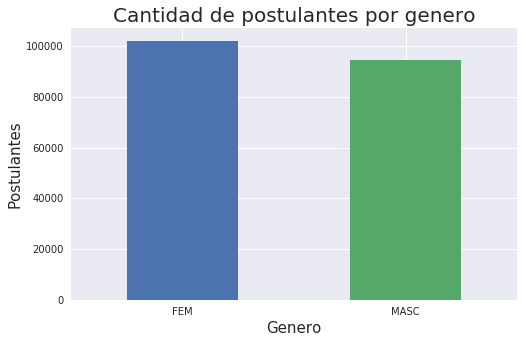

In [69]:
postulantes_genero_y_edad['sexo'].value_counts().drop('NO_DECLARA').plot(kind='bar',rot=0,figsize=(8,5))
plt.title("Cantidad de postulantes por genero",size=20)
plt.xlabel("Genero",size=15)
plt.ylabel("Postulantes",size=15)
plt.show()

## Áreas mas vistas en general

### Áreas más vistas a nivel general

In [46]:
df_avisos_detalle_min = avisos_detalle.drop(['titulo','idpais','descripcion','ciudad','mapacalle','denominacion_empresa'],axis=1)
df_avisos_detalle_min.head()

,idaviso,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial
1,17903700,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud
2,1000150677,Capital Federal,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción


In [47]:
df_merge = postulantes_genero_y_edad.merge(vistas,how='inner',on='idpostulante').drop('timestamp', axis=1).rename(str.lower, axis=1)
df_merge = df_merge.merge(df_avisos_detalle_min,how='inner',on='idaviso')
df_merge = df_merge.merge(postulantes_educacion,how='inner',on='idpostulante')
df_merge.head()

,idpostulante,fechanacimiento,sexo,edad,idaviso,fechavisualizacion,horavisualizacion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,gradoactual,estado
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
1,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,20:53:48.610000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado
3,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:05.411000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,55,1112315188,2018-02-28,21:14:04.673000,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Contabilidad,Universitario,Graduado


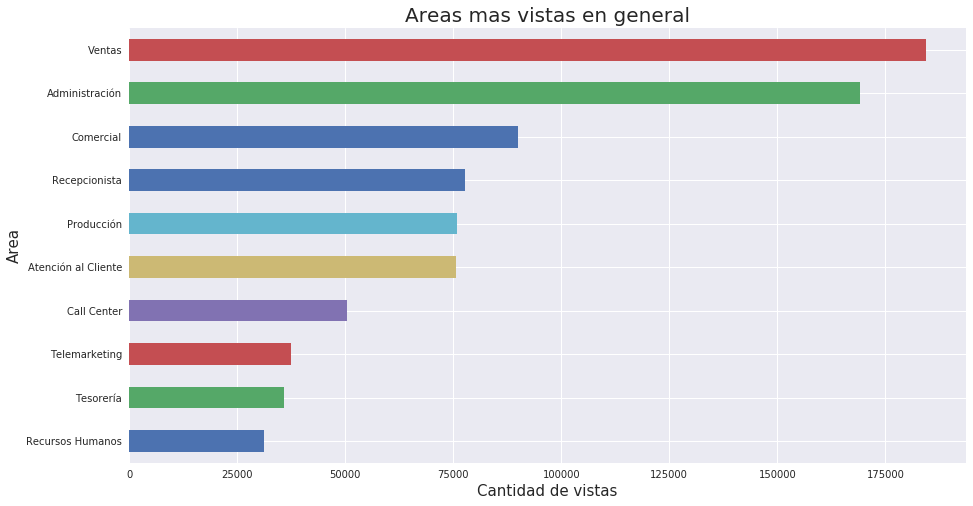

In [91]:
df_merge['nombre_area'].value_counts().head(10).sort_values().plot(kind='barh',figsize=(15,8))
plt.title("Areas mas vistas en general", size=20)
plt.ylabel("Area", size=15)
plt.xlabel("Cantidad de vistas", size=15)
plt.show()

### Areas mas vistas por el genero fememino 

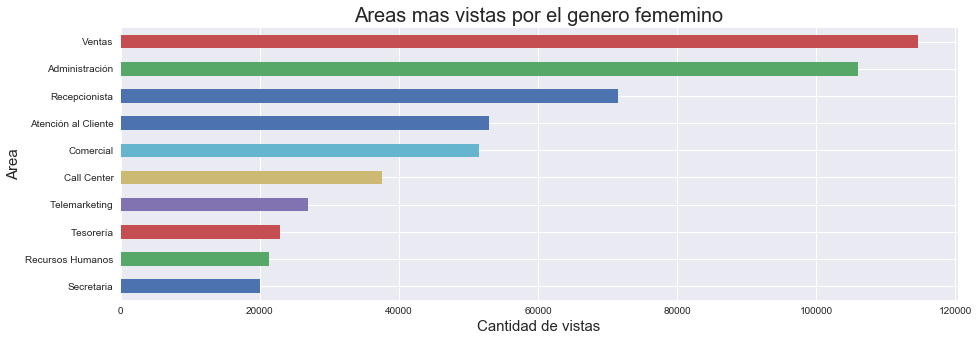

In [34]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['FEM'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero fememino", size=20)
plt.ylabel("Area", size=15)
plt.xlabel("Cantidad de vistas", size=15)
plt.show()

### Areas mas vistas por el genero masculino 

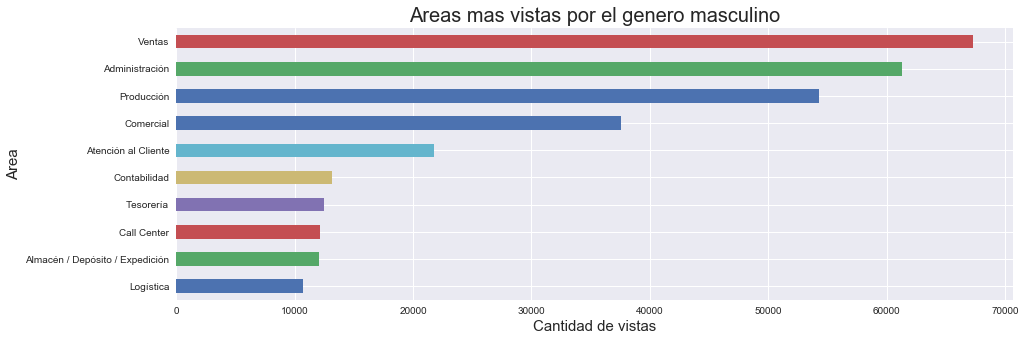

In [35]:
df_merge.groupby(['sexo','nombre_area']).count()['idpostulante']['MASC'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas por el genero masculino", size=20)
plt.ylabel("Area", size=15)
plt.xlabel("Cantidad de vistas", size=15)
plt.show()

### Areas mas vistas, nivel universitario

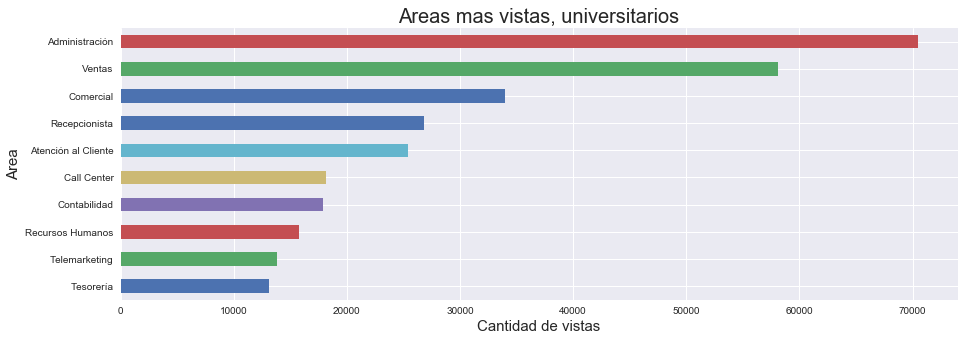

In [36]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Universitario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, universitarios", size=20)
plt.ylabel("Area", size=15)
plt.xlabel("Cantidad de vistas", size=15)
plt.show()

### Areas mas vistas, nivel secundario 

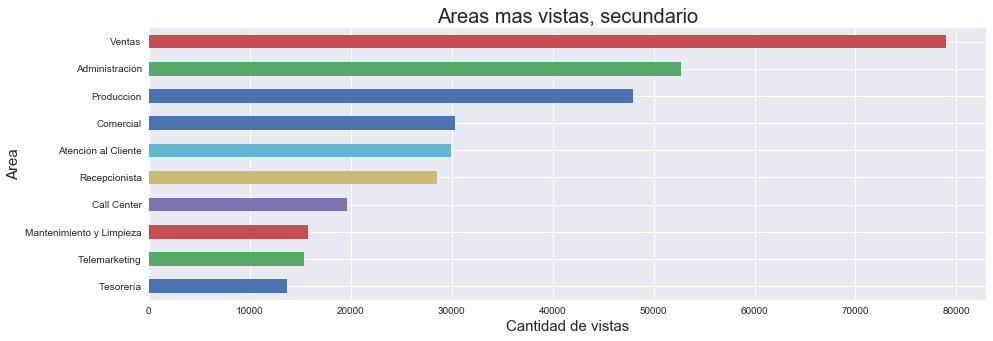

In [37]:
df_merge.groupby(['gradoactual','nombre_area']).count()['idpostulante']['Secundario'].sort_values(ascending=False).head(10).sort_values().plot(kind='barh',figsize=(15,5))
plt.title("Areas mas vistas, secundario", size=20)
plt.ylabel("Area", size=15)
plt.xlabel("Cantidad de vistas", size=15)
plt.show()

## Areas mas postuladas 

### Top 10 áreas de trabajo con más postulaciones

In [44]:
#Para averiguarlo, vamos a tener que juntar el df de postulaciones con el de avisos_detalle

postulaciones_x_avisos_detalle = pd.merge(avisos_detalle, postulaciones, on='idaviso', how='inner')
postulaciones_x_avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,idpostulante,fechahorapostulacion,fechapostulacion,horapostulacion,diapostulacion
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,4rWEjrA,2018-01-16 21:58:40,2018-01-16,21:58:40,Tuesday
1,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,qewD0aR,2018-02-06 15:51:54,2018-02-06,15:51:54,Tuesday
2,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,3N2dBdq,2018-02-08 10:49:43,2018-02-08,10:49:43,Thursday
3,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,0zkx2dY,2018-02-07 06:32:25,2018-02-07,06:32:25,Wednesday
4,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,ZDrdPVR,2018-01-15 09:23:40,2018-01-15,09:23:40,Monday


In [45]:
#Obtengo las diez areas con mas postulaciones

top_10_areas_con_mas_postulaciones = postulaciones_x_avisos_detalle.groupby('nombre_area').agg({'idaviso':'count'}).sort_values('idaviso',ascending=False).head(10)

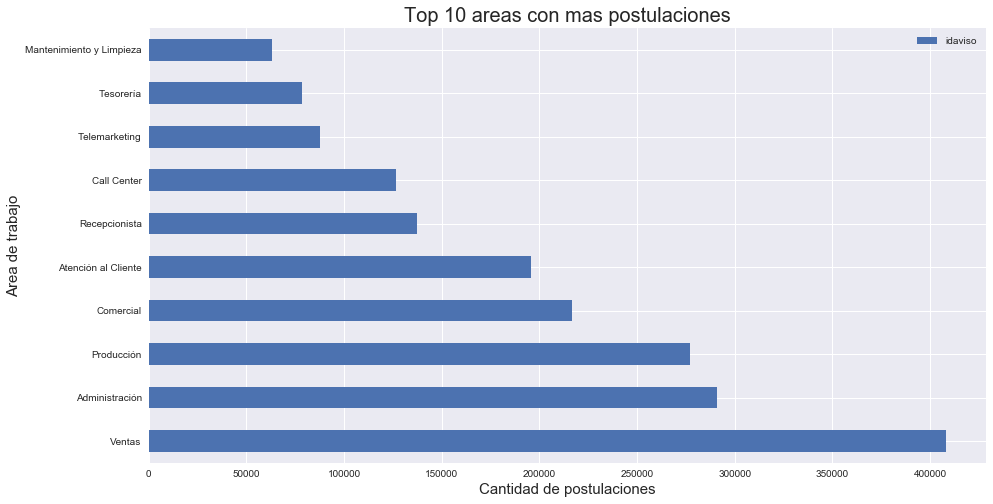

In [47]:
#Podemos observar que más del 50% de las postulaciones se reparten entre las áreas de call center, 
#recepcionista, atención al cliente, comercial, producción, administración y ventas.
plot = top_10_areas_con_mas_postulaciones.plot(kind='barh',grid=True,figsize=(15,8))
plt.title('Top 10 areas con mas postulaciones', size=20)
plt.xlabel("Cantidad de postulaciones", size=15)
plt.ylabel("Area de trabajo", size=15)
plt.show()

### Distribucion de edades de postulantes dentro de las 10 áreas más populares


In [48]:
#Voy a seguir usando el mismo df que obtuve del merge anterior, ahora lo junto con postulantes_genero_y_edad para obtener las 
#edades de quienes postulan

postulaciones_x_avisos_detalle_x_postulantes = pd.merge(postulaciones_x_avisos_detalle, postulantes_genero_y_edad, on='idpostulante', how='inner')

In [49]:
#Del dataframe que acabo de formar me quedo solamente con los registros que pertenecen a las diez areas observadas

top_10_areas_con_mas_postulaciones = top_10_areas_con_mas_postulaciones.reset_index()
avisos_de_areas_con_mas_postulantes = pd.merge(postulaciones_x_avisos_detalle_x_postulantes, top_10_areas_con_mas_postulaciones, on='nombre_area', how='inner')

In [75]:
avisos_de_areas_con_mas_postulantes.head()

,idaviso_x,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,...,fechahorapostulacion,fechapostulacion,horapostulacion,Month,Number,diapostulacion,fechanacimiento,sexo,edad,idaviso_y
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-01-16 21:58:40,2018-01-16,21:58:40,Jan,16,Tuesday,1984-06-08,MASC,33,216677
1,1112160508,1,Ejecutivo/a de Ventas para atender clientes re...,"<p> </p><p style=""""><strong><span style="""">Ade...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-01-15 22:46:36,2018-01-15,22:46:36,Jan,15,Monday,1984-06-08,MASC,33,216677
2,1112293493,1,Asesor Comercial SSR - Teletrabajo. Rosario,<p><em><strong>Para prestigiosa firma dedicada...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Senior / Semi-Senior,Comercial,...,2018-02-20 12:11:26,2018-02-20,12:11:26,Feb,20,Tuesday,1984-06-08,MASC,33,216677
3,1112241972,1,Ejecutivo de cuentas para empresa de tecnologi...,<p>Entre sus tareas mas importantes se encuent...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-02-15 22:38:24,2018-02-15,22:38:24,Feb,15,Thursday,1984-06-08,MASC,33,216677
4,1112336366,1,Ejecutivo de Ventas (Rosario),"<p><span lang=""ES"">LoJack se encuentra en búsq...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,...,2018-02-15 22:39:56,2018-02-15,22:39:56,Feb,15,Thursday,1984-06-08,MASC,33,216677


In [50]:
#Tabla pivot para poder graficar un heatmap

tabla_pivot_avisos=avisos_de_areas_con_mas_postulantes.pivot_table(index='edad', columns='nombre_area', values='idaviso_x', aggfunc='count')

In [51]:
#Cambio los nombres de las columnas para evitar problemas con las tildes

tabla_pivot_avisos=tabla_pivot_avisos.rename(columns={'Administración':'Administracion','Atención al Cliente':'Atencion al Cliente','Producción':'Produccion','Tesorería':'Tesoreria'})

In [52]:
#Reviso edades ilogicas en el dataframe
avisos_de_areas_con_mas_postulantes['edad'].value_counts().sort_index().index

Int64Index([  0,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
             29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
             42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
             55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
             68,  69,  70,  75,  76,  96, 100, 242],
           dtype='int64')

In [53]:
#Limpio al pivot de las edades ilogicas encontradas
edades_ilogicas = [0,96,100,242]
tabla_pivot_avisos.drop(edades_ilogicas,inplace=True)

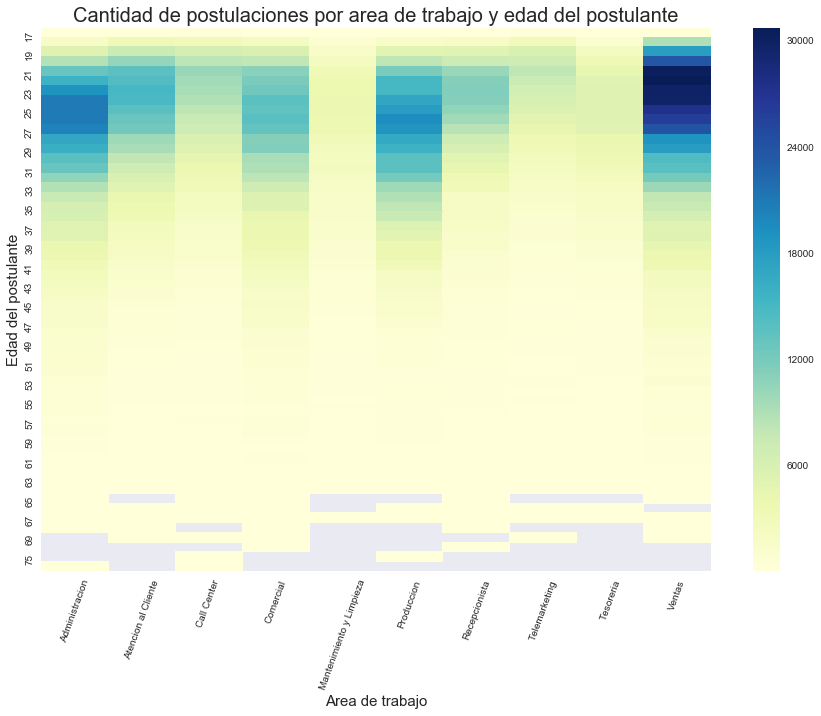

In [55]:
#Distribucion de postulantes por area segun edad de los mismos

g = sns.heatmap(tabla_pivot_avisos,  cmap="YlGnBu")
g.set_title("Cantidad de postulaciones por area de trabajo y edad del postulante", fontsize=20)
g.set_xlabel("Area de trabajo",fontsize=15)
g.set_ylabel("Edad del postulante", fontsize=15)
g.set_xticklabels(g.get_xticklabels(),rotation=70)
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

## Relacion vistas vs postulaciones

Vamos a estudiar la relacion entre los horarios de vista de publicaciones y los horarios de postulacion, para eso vamos a quedarnos con las postulaciones y vistas pertenecientes al mismo rango de fechas.

In [45]:
postulaciones['fechapostulacion'].value_counts().sort_index().index

Index([2018-01-15, 2018-01-16, 2018-01-17, 2018-01-18, 2018-01-19, 2018-01-20,
       2018-01-21, 2018-01-22, 2018-01-23, 2018-01-24, 2018-01-25, 2018-01-26,
       2018-01-27, 2018-01-28, 2018-01-29, 2018-01-30, 2018-01-31, 2018-02-01,
       2018-02-02, 2018-02-03, 2018-02-04, 2018-02-05, 2018-02-06, 2018-02-07,
       2018-02-08, 2018-02-09, 2018-02-10, 2018-02-11, 2018-02-12, 2018-02-13,
       2018-02-14, 2018-02-15, 2018-02-16, 2018-02-17, 2018-02-18, 2018-02-19,
       2018-02-20, 2018-02-21, 2018-02-22, 2018-02-23, 2018-02-24, 2018-02-25,
       2018-02-26, 2018-02-27, 2018-02-28],
      dtype='object')

In [46]:
vistas['fechavisualizacion'].value_counts().sort_index().index

Index([2018-02-23, 2018-02-24, 2018-02-25, 2018-02-26, 2018-02-27, 2018-02-28,
       2018-03-01],
      dtype='object')

In [47]:
#Me quedo con todas las vistas hasta el 28/02 inclusive

vistas_hasta_2802 = vistas.loc[vistas['timestamp'] < pd.to_datetime('2018-03-01')]
vistas_hasta_2802.head()

,idAviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23,18:38:14.296000
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23,18:38:14.329000
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23,18:38:17.921000
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23,18:38:18.973000


In [48]:
vistas_hasta_2802 = vistas_hasta_2802.rename(columns={'idAviso':'idaviso'})
vistas_hasta_2802['fechavisualizacion'].value_counts().sort_index().index

Index([2018-02-23, 2018-02-24, 2018-02-25, 2018-02-26, 2018-02-27, 2018-02-28], dtype='object')

In [49]:
#Me quedo con las postulaciones entre el 23/02 y el 28/02 inclusive

postulaciones_desde_2302 = postulaciones.loc[postulaciones['fechahorapostulacion'] >= pd.to_datetime('2018-02-23')]
postulaciones_2302_al_2802 = postulaciones_desde_2302.loc[postulaciones_desde_2302['fechahorapostulacion'] < pd.to_datetime('2018-03-01')]

In [50]:
postulaciones_2302_al_2802['fechapostulacion'].value_counts().sort_index().index

Index([2018-02-23, 2018-02-24, 2018-02-25, 2018-02-26, 2018-02-27, 2018-02-28], dtype='object')

### Relacion general entre vistas y postulaciones

In [51]:
#Existen casos donde hay registros en el dataframe de postulaciones que no tienen su correspondiente visualizacion en vistas.
#Entendemos que se trata de un error en los datos puesto que no tiene sentido postularse en un anuncio que uno no miró primero.
#Por lo tanto, elegimos el left join para filtrar esos registros.

vistas_postulaciones = pd.merge(vistas_hasta_2802,postulaciones_2302_al_2802,on=['idaviso','idpostulante'],how='left')
vistas_postulaciones.head()

,idaviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion,fechahorapostulacion,fechapostulacion,horapostulacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000,2018-02-23 13:38:49,2018-02-23,13:38:49
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,2018-02-23,18:38:14.296000,NaT,NaN,NaN
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,2018-02-23,18:38:14.329000,2018-02-23 13:39:23,2018-02-23,13:39:23
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,2018-02-23,18:38:17.921000,NaT,NaN,NaN
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,2018-02-23,18:38:18.973000,2018-02-23 13:38:40,2018-02-23,13:38:40


In [52]:
vistas_postulaciones.loc[vistas_postulaciones.idpostulante == 'YjVJQ6Z']

,idaviso,timestamp,idpostulante,fechavisualizacion,horavisualizacion,fechahorapostulacion,fechapostulacion,horapostulacion
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,2018-02-23,18:38:13.187000,2018-02-23 13:38:49,2018-02-23,13:38:49
585650,1112301574,2018-02-27 16:28:37.162,YjVJQ6Z,2018-02-27,16:28:37.162000,NaT,NaN,NaN
592489,1112319451,2018-02-27 16:26:31.101,YjVJQ6Z,2018-02-27,16:26:31.101000,2018-02-23 13:35:44,2018-02-23,13:35:44
598376,1112326950,2018-02-27 16:28:43.417,YjVJQ6Z,2018-02-27,16:28:43.417000,2018-02-27 11:28:56,2018-02-27,11:28:56


### ¿Existe relación entre la hora de vista de una publicación y la fecha de postulación a la misma?

In [53]:
#Preparo los datos para poder armar la visualizacion

cantidad_postulaciones_por_hora = pd.DataFrame(vistas_postulaciones['horapostulacion'].value_counts())
cantidad_postulaciones_por_hora = cantidad_postulaciones_por_hora.rename(columns={'horapostulacion':'postulaciones'})
cantidad_vistas_por_hora = pd.DataFrame(vistas_postulaciones['horavisualizacion'].apply(lambda x: x.replace(microsecond=0)).value_counts())
cantidad_vistas_por_hora = cantidad_vistas_por_hora.rename(columns={'horavisualizacion':'visualizaciones'})
cantidad_postulaciones_por_hora = cantidad_postulaciones_por_hora.reset_index()
cantidad_vistas_por_hora = cantidad_vistas_por_hora.reset_index()
cantidad_vistas_postulaciones_por_hora = pd.merge(cantidad_postulaciones_por_hora,cantidad_vistas_por_hora,how='outer',on='index').fillna(0).set_index('index')

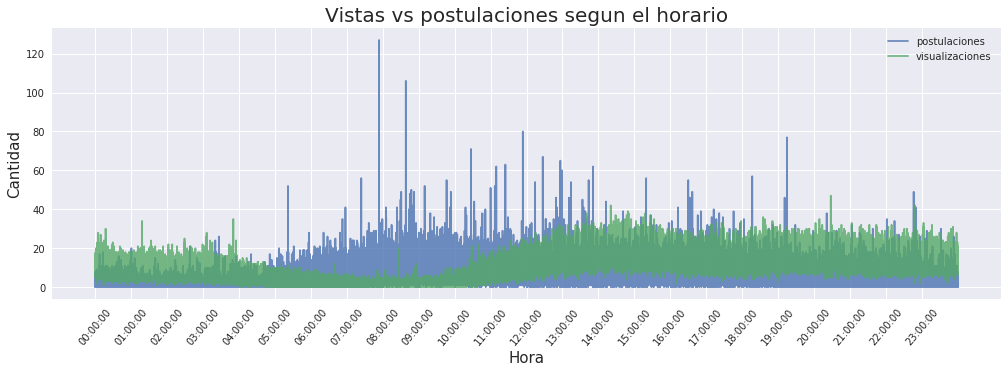

In [54]:
horas = [datetime.time(i) for i in range(24)]
cantidad_vistas_postulaciones_por_hora[['postulaciones','visualizaciones']].plot(kind='line', figsize=(17,5),rot=50,alpha=0.8)
plt.title("Vistas vs postulaciones segun el horario", size=20)
plt.xticks(horas)
plt.xlabel("Hora", size=15)
plt.ylabel("Cantidad", size=15)
plt.show()

### ¿Influye el nivel de educacion en el porcentaje vista-postulacion? 

In [55]:
##FALTA HACER

### Areas con mejor porcentaje vista-postulacion 

In [56]:
##FALTA HACER

### Relacion vista-postulacion en las diez areas mas postuladas 

In [57]:
grouped_vistas_postulaciones = vistas_postulaciones.groupby('idaviso').agg({'timestamp':'count','fechahorapostulacion':'count'})
grouped_vistas_postulaciones.head()

,timestamp,fechahorapostulacion
idaviso,,
1585950,1,0
1672250,2,0
1799300,1,0
2613010,4,0
3006520,1,0


In [58]:
grouped_vistas_postulaciones = grouped_vistas_postulaciones.reset_index().merge(avisos_detalle,on='idaviso',how='inner')
grouped_vistas_postulaciones = grouped_vistas_postulaciones.groupby('nombre_area').agg({'fechahorapostulacion':'sum','timestamp':'sum'})

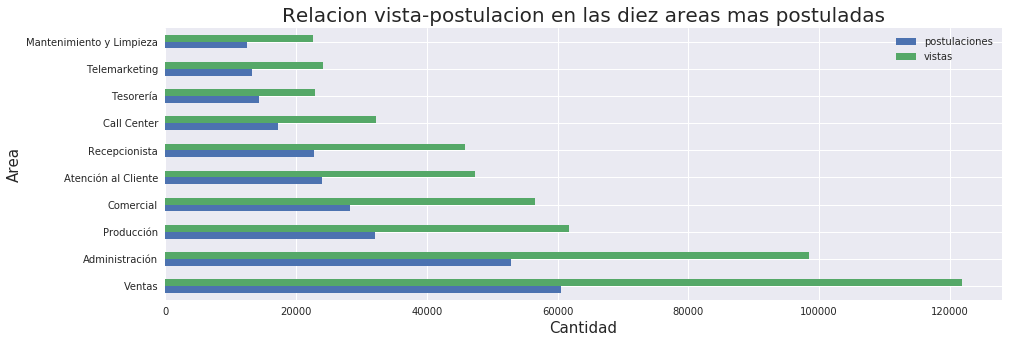

In [62]:
#Modifico nombres de columnas y ordeno para tomar las diez areas mas postuladas

grouped_vistas_postulaciones = grouped_vistas_postulaciones.rename(columns = {'fechahorapostulacion':'postulaciones','timestamp':'vistas'})
grouped_vistas_postulaciones.sort_values('postulaciones',ascending=False).head(10).plot(kind='barh', figsize=(15,5))
plt.title('Relacion vista-postulacion en las diez areas mas postuladas', size=20)
plt.ylabel('Area', size=15)
plt.xlabel('Cantidad', size=15)
plt.show()

## Relacion vista-postulacion en el top 10 de edades de postulantes

In [63]:
df_merge_vistas = postulantes_genero_y_edad.merge(vistas,how='inner',on='idpostulante')
df_merge_vistas.head()

,idpostulante,fechanacimiento,sexo,edad,idAviso,timestamp,fechavisualizacion,horavisualizacion
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 20:53:48.610,2018-02-28,20:53:48.610000
1,5awk,1962-12-04,FEM,55,1112330625,2018-02-28 20:56:56.111,2018-02-28,20:56:56.111000
2,5awk,1962-12-04,FEM,55,1112303543,2018-02-28 21:13:27.505,2018-02-28,21:13:27.505000
3,5awk,1962-12-04,FEM,55,1112303543,2018-02-28 21:13:28.590,2018-02-28,21:13:28.590000
4,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 21:14:05.411,2018-02-28,21:14:05.411000


In [64]:
df_merge_postulaciones = postulantes_genero_y_edad.merge(postulaciones,how='inner',on='idpostulante')
df_merge_postulaciones.head()

,idpostulante,fechanacimiento,sexo,edad,idaviso,fechahorapostulacion,fechapostulacion,horapostulacion
0,NM5M,1970-12-03,FEM,47,1112257047,2018-01-15 16:22:34,2018-01-15,16:22:34
1,NM5M,1970-12-03,FEM,47,1111920714,2018-02-06 09:04:50,2018-02-06,09:04:50
2,NM5M,1970-12-03,FEM,47,1112346945,2018-02-22 09:04:47,2018-02-22,09:04:47
3,NM5M,1970-12-03,FEM,47,1112345547,2018-02-22 09:04:59,2018-02-22,09:04:59
4,5awk,1962-12-04,FEM,55,1112237522,2018-01-25 18:55:03,2018-01-25,18:55:03


In [65]:
#tomo las vistas y postulaciones del 23/02 al 28/02
df_merge_vistas = df_merge_vistas[df_merge_vistas['fechavisualizacion'] < datetime.date(2018,3,1)]
df_merge_postulaciones = df_merge_postulaciones[df_merge_postulaciones['fechapostulacion'] > datetime.date(2018,2,22)]

In [66]:
def esta_en_top10_edades(x):
    top10_edades = [x for x in range(20,31)]
    for i in range(len(top10_edades)):
        if (top10_edades[i] == x):
            return True
    return False

df_edades_postulaciones = df_merge_postulaciones[df_merge_postulaciones['edad'].apply(lambda x: esta_en_top10_edades(x))]['edad'].value_counts().to_frame().rename(columns={'edad':'cantidad_postulaciones'})
df_edades_vistas = df_merge_vistas[df_merge_vistas['edad'].apply(lambda x: esta_en_top10_edades(x))]['edad'].value_counts().to_frame().rename(columns={'edad':'cantidad_vistas'})

In [67]:
df_edades_vistas_vs_postulaciones = df_edades_vistas.merge(df_edades_postulaciones,left_index=True,right_index=True)
df_edades_vistas_vs_postulaciones.head()

,cantidad_vistas,cantidad_postulaciones
24,54721,36172
27,53174,34058
26,52511,34465
25,52340,34252
23,51254,35187


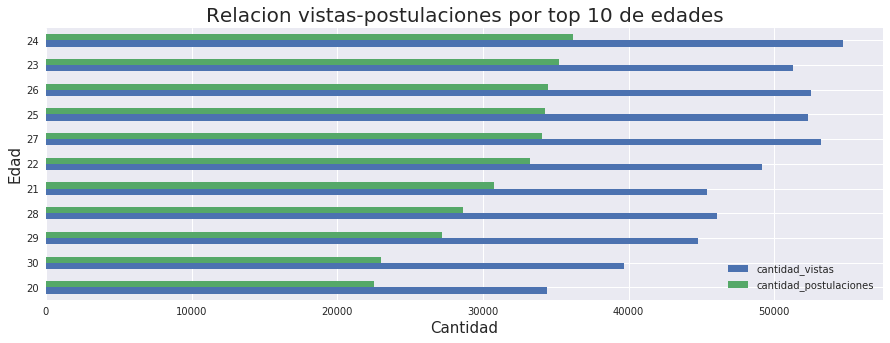

In [68]:
df_edades_vistas_vs_postulaciones.sort_values(by='cantidad_postulaciones').plot(kind='barh', rot=0, figsize=(15,5))
plt.title("Relacion vistas-postulaciones por top 10 de edades", size=20)
plt.ylabel("Edad", size=15)
plt.xlabel("Cantidad", size=15)
plt.show()

In [69]:
df_genero_vistas = df_merge_vistas['sexo'].value_counts().to_frame().rename(columns={'sexo':'cantidad_vistas'})
df_genero_postulaciones = df_merge_postulaciones['sexo'].value_counts().to_frame().rename(columns={'sexo':'cantidad_postulaciones'})

In [70]:
df_generos_vistas_vs_postulaciones = df_genero_vistas.merge(df_genero_postulaciones, left_index=True, right_index=True)
df_generos_vistas_vs_postulaciones.drop('NO_DECLARA',inplace=True)
df_generos_vistas_vs_postulaciones

,cantidad_vistas,cantidad_postulaciones
FEM,514404,272479
MASC,385741,258767


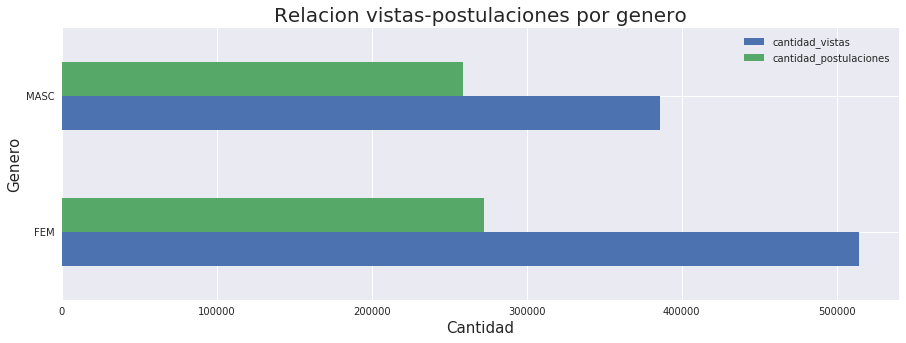

In [71]:
df_generos_vistas_vs_postulaciones.plot(kind='barh', rot=0, figsize=(15,5))
plt.title("Relacion vistas-postulaciones por genero", size=20)
plt.ylabel("Genero", size=15)
plt.xlabel("Cantidad", size=15)
plt.show()

## Relacion vistas-postulaciones por educacion

In [72]:
df_merge_vistas = df_merge_vistas.merge(postulantes_educacion, how='inner',on='idpostulante')
df_merge_vistas.head()

,idpostulante,fechanacimiento,sexo,edad,idAviso,timestamp,fechavisualizacion,horavisualizacion,gradoactual,estado
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 20:53:48.610,2018-02-28,20:53:48.610000,Universitario,Graduado
1,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 20:53:48.610,2018-02-28,20:53:48.610000,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,55,1112330625,2018-02-28 20:56:56.111,2018-02-28,20:56:56.111000,Universitario,Graduado
3,5awk,1962-12-04,FEM,55,1112330625,2018-02-28 20:56:56.111,2018-02-28,20:56:56.111000,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,55,1112303543,2018-02-28 21:13:27.505,2018-02-28,21:13:27.505000,Universitario,Graduado


In [73]:
df_merge_postulaciones = df_merge_postulaciones.merge(postulantes_educacion, how='inner',on='idpostulante')
df_merge_postulaciones.head()

,idpostulante,fechanacimiento,sexo,edad,idaviso,fechahorapostulacion,fechapostulacion,horapostulacion,gradoactual,estado
0,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 15:54:28,2018-02-28,15:54:28,Universitario,Graduado
1,5awk,1962-12-04,FEM,55,1112315188,2018-02-28 15:54:28,2018-02-28,15:54:28,Terciario/Técnico,Graduado
2,5awk,1962-12-04,FEM,55,1112346738,2018-02-28 15:54:47,2018-02-28,15:54:47,Universitario,Graduado
3,5awk,1962-12-04,FEM,55,1112346738,2018-02-28 15:54:47,2018-02-28,15:54:47,Terciario/Técnico,Graduado
4,5awk,1962-12-04,FEM,55,1112330625,2018-02-28 15:56:43,2018-02-28,15:56:43,Universitario,Graduado


In [74]:
df_educacion_vistas = df_merge_vistas['gradoactual'].value_counts().to_frame().rename(columns={'gradoactual':'cantidad_vistas'})
df_educacion_postulaciones = df_merge_postulaciones['gradoactual'].value_counts().to_frame().rename(columns={'gradoactual':'cantidad_postulaciones'})

In [75]:
df_educacion_vistas_vs_postulaciones = df_educacion_vistas.merge(df_educacion_postulaciones, left_index=True, right_index=True)
df_educacion_vistas_vs_postulaciones.drop('Doctorado',inplace=True)
df_educacion_vistas_vs_postulaciones

,cantidad_vistas,cantidad_postulaciones
Universitario,517169,296781
Secundario,500521,324603
Terciario/Técnico,220984,134673
Otro,100745,79469
Posgrado,30956,17968
Master,13741,8638


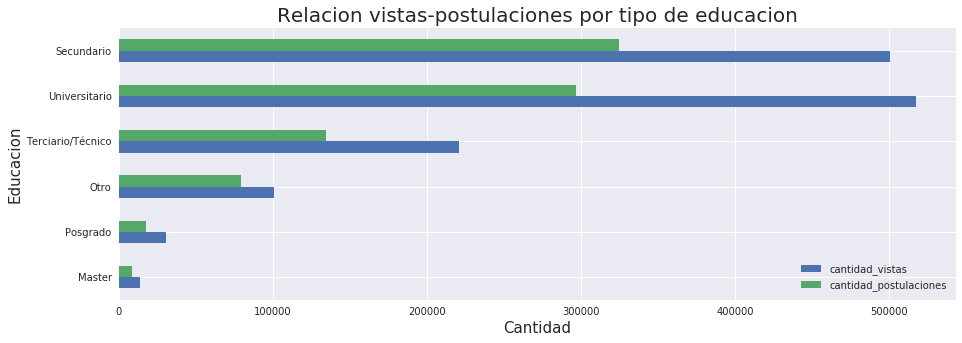

In [76]:
df_educacion_vistas_vs_postulaciones.sort_values(by='cantidad_postulaciones').plot(kind='barh', figsize=(15,5))
plt.title("Relacion vistas-postulaciones por tipo de educacion", size=20)
plt.ylabel("Educacion", size=15)
plt.xlabel("Cantidad", size=15)
plt.show()